# Lab 6 
## Aligning Illumina Reads to Reference Genome

### Part 1: Checking Reads for Human Genome Contamination

Ran the following command in terminal:

`bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq`


This should take in the illumina reads, align it to the human genome, and all the sequences that did not align (the non-human parts of the reads) should be saved into another file).

The output for this command is:


```
1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
8.57% overall alignment rate
```

Based on this output, it seems that there are 1124714 total sequences within the illumina_reads file, and of these sequences, 8.57% of them aligned to the human genome, which means that 91.43% of the original reads are not from human genome contamination, and ideall should be from *S. oneidensis*

### Part 2: Aligning filtered sequences against *S. oneidensis* reference genome

Ran the following command in terminal:

`bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U ~/ravi/ill-hg-unaligned.fastq -S output.sam --un unaligned.fastq`

This should take in the filtered reads, align it to the *S. oneidensis* genome, and sequences that did align should be put into the output.sam file while unaligned parts (sequences that don't belong to *S. oneidensis* or human genome) should be put into the unaligned.fastq file.

The output for this command is:

```
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    299560 (29.13%) aligned 0 times
    687571 (66.86%) aligned exactly 1 time
    41248 (4.01%) aligned >1 times
70.87% overall alignment rate

```

29.13% of the filtered library didn't align to the reference genome. 

```
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    298471 (29.02%) aligned 0 times
    688021 (66.90%) aligned exactly 1 time
    41887 (4.07%) aligned >1 times
70.98% overall alignment rate
```
```
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    298112 (28.99%) aligned 0 times
    688180 (66.92%) aligned exactly 1 time
    42087 (4.09%) aligned >1 times
71.01% overall alignment rate

```

The above are the outputs for running bowtie2 with the `--sensitive` and `--very-sensitive` argument respectively. 
There is an improvement in the amount of alignment when increasing the sensitivity, though this increase is not super big. 

### Part 3: Analysis of SAM files

Sam files were taken, converted into bam files, sorted, indexed, and then depth was calculated and put into a tab file

#### Oneidensis Tab file:

The following commands were run to create the oneidensis tab file

```
samtools view –b output.sam > output.bam
samtools sort output.bam > output.sorted.bam
samtools index output.sorted.bam
samtools depth –a output.sorted.bam > oneidensis.tab
```

The following commands were run to create the human tab file

```
samtools view –b ill-hig.sam > output.bam
samtools sort output.bam > output.sorted.bam
samtools index output.sorted.bam
samtools depth output.sorted.bam > human.tab
```

The -a flag was dropped in the depth command because otherwise the file length was too large to parse

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw=[]
position = []
count = []
with open("oneidensis.tab",'rt') as input:
    for i in input:
        raw.append(i)

In [3]:
for i in raw:
    position.append(int(i.split('\t')[1]))
    count.append(int(i.split('\t')[2].split('\n')[0]))

Text(0, 0.5, 'Depth of Coverage')

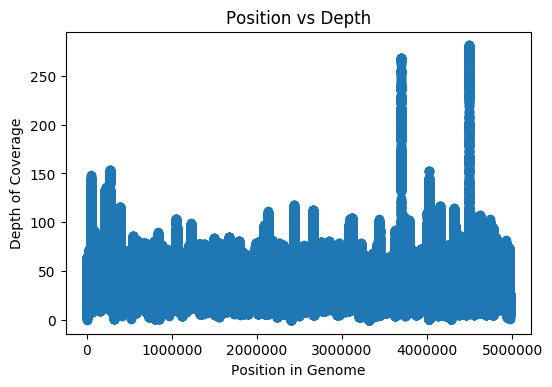

In [25]:
x=position
y=count
fig, ax=plt.subplots(dpi=100)
plt.scatter(x,y)
plt.title('Position vs Depth')
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')

Text(0, 0.5, 'Count')

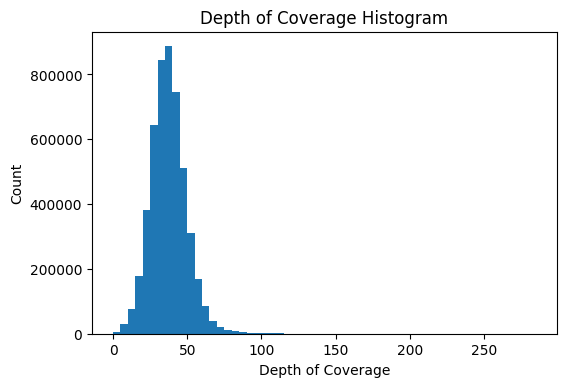

In [22]:
data=count
binwidth=5
fig, ax=plt.subplots(dpi=100)
plt.hist(y,bins=range(min(data), max(data) + binwidth, binwidth))
plt.title('Depth of Coverage Histogram')
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')

In [28]:
print(min(count),
      max(count),
      np.mean(count))

0 281 37.03830306625343


The min of the data is 0, the max of the data is 281, and the mean of the data is 37.04

### EC 1: Depth of Coverage against Human Genome

Calculated the average depth coverage per base pair for each chromosome. 

In [8]:
allchro = []
chromosomes = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14',
              'chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY']
l = 0
current = []
summed=[]
with open('/home/be131-14/ravi/human/human.tab','rt') as inp:
    for i in inp:
        try:
            if i.split('\t')[0] in chromosomes[l]:
                current.append(int(i.split('\t')[2]))
            elif i.split('\t')[0] not in chromosomes[l]:
                if l < len(chromosomes):
                    summed.append(sum((current)))
                    l += 1
                    current = []
                else:
                    break
        except:
            pass

In [9]:
chrolengths = [248956422,242193529,198295559,190214555,181538259,170805979,159345973,145138636,138394717,133797422,
              135086622,133275309,114364328,107043718,101991189,90338345,83257441,80373285,58617616,64444167,
              46709983,50818468,156040895,57227415]

In [10]:
divided = np.array(summed)/np.array(chrolengths)

In [11]:
nochr = []
for i in chromosomes:
    nochr.append(i.replace('chr',''))

Text(0, 0.5, 'Depth of Coverage')

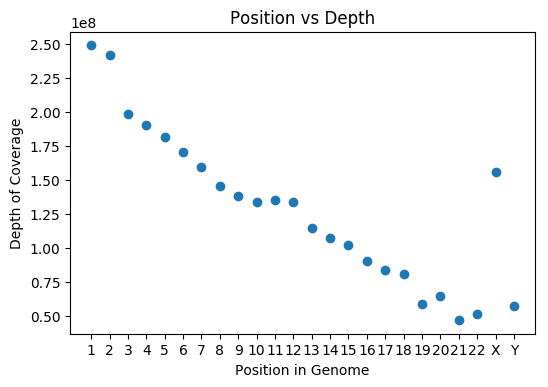

In [6]:
x=nochr
y=chrolengths
fig, ax=plt.subplots(dpi=100)
plt.scatter(x,y)
plt.title('Position vs Depth')
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')

In [12]:
divided

array([0.00912979, 0.00994492, 0.00992247, 0.00995947, 0.00989402,
       0.0099136 , 0.00983977, 0.00994239, 0.00871923, 0.00989461,
       0.00981589, 0.0098815 , 0.00845866, 0.00832244, 0.00809398,
       0.00882368, 0.00945669, 0.0093921 , 0.00956665, 0.00929855,
       0.00751351, 0.00693392, 0.00966707, 0.00427222])

Text(0, 0.5, 'Count')

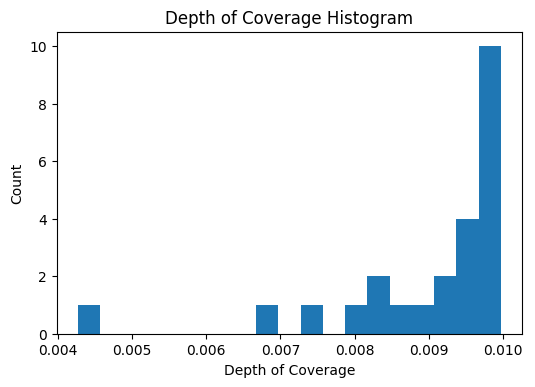

In [15]:
data=divided
binwidth=.0003
fig, ax=plt.subplots(dpi=100)
plt.hist(data,bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.title('Depth of Coverage Histogram')
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')

Since the length of the `summed` list is equal to the length of the `chromosomes` list (24), Jamie must have a Y chromosome

### EC 2: Zooming in on positions with higher than average depth of coverage

Zoomed into regions that had a depth count over 120, which is well above the average. I grouped positions that were within 1000 bp of each other together, in order to minimize the number of positional ranges I got with small ranges (ex: 4 total positions). 

In [8]:
aboveavpos = []
aboveavcount = []
for i in range(len(count)):
    if count[i] > 120:
        aboveavpos.append(position[i])
        aboveavcount.append(count[i])

position range is 47030-47494
position range is 49815-49904
position range is 217630-218130
position range is 220811-221542
position range is 273470-273695
position range is 3698978-3699859
position range is 4027770-4028329


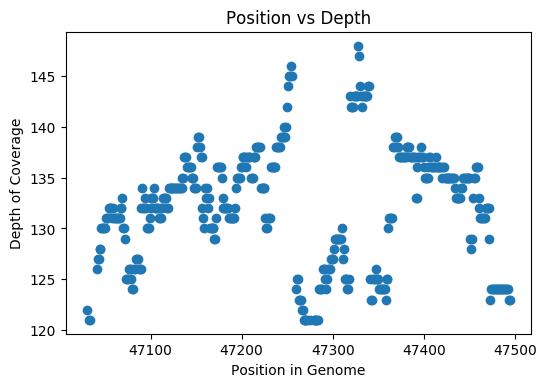

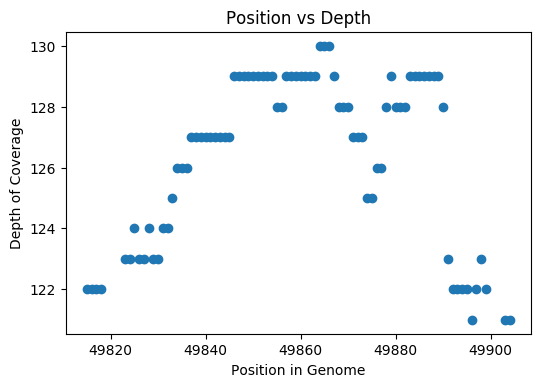

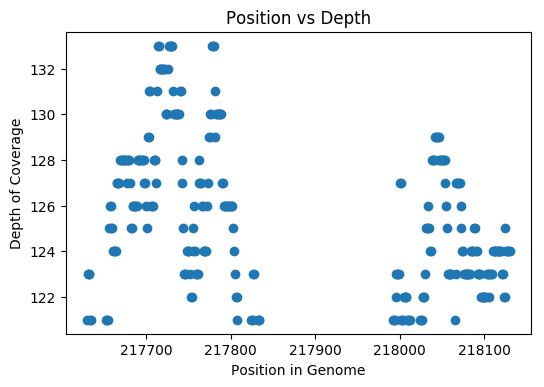

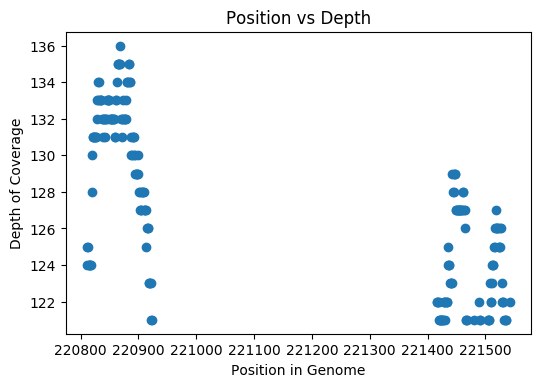

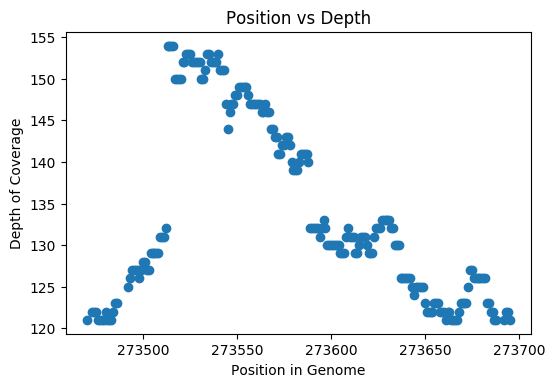

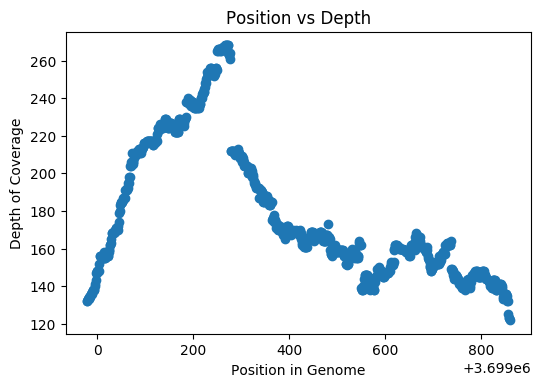

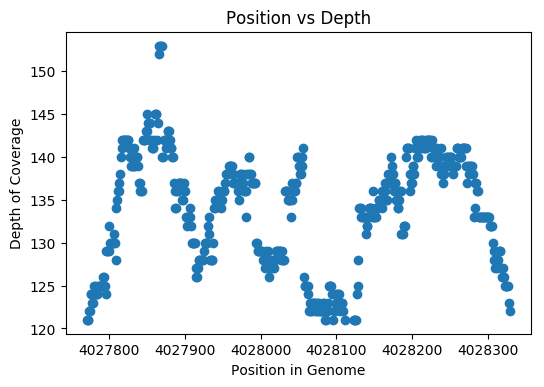

In [23]:
seppos = []
sepcount = []
for i in range(len(aboveavpos)-1):
    if aboveavpos[i+1] - aboveavpos[i] < 1000:
        seppos.append(aboveavpos[i])
        sepcount.append(aboveavcount[i])
        #sep.append(aboveavpos[i+1])
    else:
        if len(seppos) != 0:
            x=seppos
            y=sepcount
            fig, ax=plt.subplots(dpi=100)
            plt.scatter(x,y)
            plt.title('Position vs Depth')
            plt.xlabel('Position in Genome')
            plt.ylabel('Depth of Coverage')
            print('position range is ' + str(min(seppos)) + '-' + str(max(seppos)))
            seppos = []
            sepcount = []

47030-47494: rrsA gene

49815-49904: rrlA gene

217630-218130: rrsB gene

220811-221542: rrlB gene

273470-273695: rrlC gene

3698978-3699859: tnpA gene

4027770-4028329: tnpA gene